# CSE2530 Computational Intelligence
## Assignment 1: Artificial Neural Networks

<div style="background-color:#f0e7d1">

_Fill in your group number **from Brightspace**, names, and student numbers._
    
|    Group                 |           11         |
|------------|----------------------|
| Cosmin Andrei Vasilescu  |        5734975       |
| Traian Dobrin|        5749751       |
| Vlad Alexan  |        5773644       |
| Andrei Ionita  |      5735327     |

#### Imports

In [2]:
# You may only use numpy to implement your neural network
# You are not allowed to use scikit-learn, other than for Section 1.6.
# You are also not allowed to use Pytorch, 
# Tensorflow, and similar machine learning frameworks.
# You can make use of any other libraries for miscellaneous
# functions, e.g. to create the visual aids.

# Put all of your imports in this code block
import numpy as np
import matplotlib.pyplot as plt
import math

# For reproducibility, we set a specific seed to np.random
print("started")

started


#### Loading the data

In [3]:
features = np.genfromtxt("../data/features.txt", delimiter=",")
targets = np.genfromtxt("../data/targets.txt", delimiter=",")
unknown = np.genfromtxt("../data/unknown.txt", delimiter=",")

## 1 Questions
### 1.2 Architecture
#### Question 1:

In [4]:
class SimplePerceptron:
    def __init__(self, learning_rate=0.1):
        #initializing the weights and bias with random values
        np.random.seed(225200)
        self.w1=np.random.uniform(low=0.0,high=1.0)
        np.random.seed(225200)
        self.w2=np.random.uniform(low=0.0,high=1.0)
        self.bias=0.5
        self.learning_rate=learning_rate
        
    #forward propagation function
    def infer(self,data):
        z=self.w1*data[0]+self.w2*data[1]+self.bias
        pred=self.activation_function(z)
        return pred
    
    #activation function
    def activation_function(self, x):
        if x>=0:
            return 1
        return 0
    
    '''-losses_per_epoch keeps track of the absolute value of all the losses, 
        for plotting purposes
       -the function works by going through the labels and features given 
        and computing the loss, and finally updating
        the weights after each row of data'''
    
    def train(self,epochs,features,labels):
        losses_per_epoch = []
        for i in range(epochs):
            total_loss=0
            for x,y in zip(features,labels):
                pred = self.infer(x)
                loss=y-pred
                total_loss += abs(loss)
                self.backpropagate(loss,x)
            losses_per_epoch.append(total_loss)
        return losses_per_epoch
    
    #backpropagation function
    def backpropagate(self,loss,instance):
        self.w1+=self.learning_rate*instance[0]*loss
        self.w2+=self.learning_rate*instance[1]*loss
        self.bias+=self.learning_rate*loss    

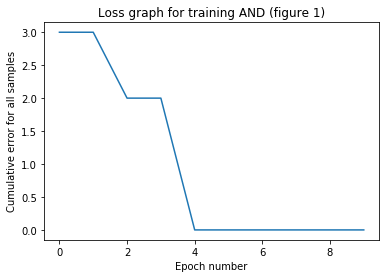

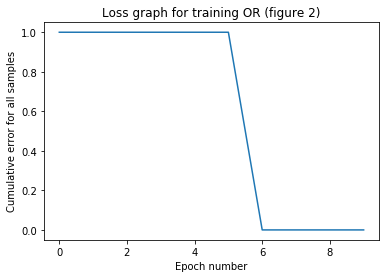

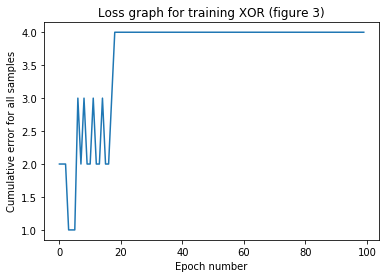

In [5]:
#input data represented by all possible combinations of two input values of 0 and 1
#labels represent the correct values given the inputs
binary_features=[[0,0],[0,1],[1,0],[1,1]]
labelsAND=[0,0,0,1]
labelsOR=[0,1,1,1]
labelsXOR=[0,1,1,0]
operation_index = 0

#general training and plotting function
def train_and_plot(labels, operation, features = binary_features, no_epochs = 10):
    p = SimplePerceptron()
    global operation_index
    operation_index+=1
    losses = p.train(no_epochs,features,labels)
    plt.xlabel("Epoch number")
    plt.ylabel("Cumulative error for all samples")
    plt.title("Loss graph for training " + operation +
              " (figure " + str(operation_index) + ")")
    plt.plot(np.arange(no_epochs),losses)
    plt.show()
    
train_and_plot(labelsAND, "AND")
train_and_plot(labelsOR, "OR")
train_and_plot(labelsXOR, "XOR", no_epochs = 100)

<div style="background-color:#f0e7d1">

As we can see from the plots, for the AND and OR operations, our perceptron is able to learn the correct values for the weights and the bias in order to be able to correctly simulate the operations, converging to a 0 loss (see figure 1 and 2). However, with only one perceptron, we are essentially training a linear classifier, and, since the XOR labels are not linearly separable (see figure 4 below), it is (mathematically) impossible to have a zero-loss perceptron, even with a high number of epochs - we never reach a zero loss (see figure 3).

<figure>
  <img
  src="f4.png"
  alt="figure 4">
  <figcaption>Simulating the XOR operation is only possible with a non-linear classifier (figure 4)</figcaption>
</figure>


#### Question 2

<div style="background-color:#f0e7d1">

For our task, we will need 10 input neurons. Each input neuron will correspond to one of the features of the samples we will be trying to classify.

#### Question 3

<div style="background-color:#f0e7d1">

We will need 7 output neurons. Each output neuron will correspond to one of the classes we will be trying to classify our samples in.

#### Question 4

<div style="background-color:#f0e7d1">

Our initial guess is that we should use 2 hidden layers: the first will have 9 neurons and the second will have 8. The idea is that we are starting with 10 initial neurons in the first layer and want to finish with 7 in the final layer. This guess is also partly based on the idea that a (perhaps more complex) MLP classifying hand written digits can also work with just 2 hidden layers.

#### Question 5

<div style="background-color:#f0e7d1">

We will be using Leaky ReLU as an activation function, because it is computationally efficient and we will not have to worry about gradients becoming too small and eventually  “vanishing”. It can also handle negative values of z. It will also make the network be able to handle non-linearity and detect more complex patterns in the data. For the last output layer, we could additionally apply a softmax activation function on our outputs in order to get a more informative output, using mutually exclusive labels for our multiclass classfication. However, the softmax wouldn't actually change the final result, since the class that had the highest value, would stay the same. It would only give more meaning to the entire output layer, but in the context of a grocery robot, just having the predicted class would suffice.

#### Question 6

<div style="background-color:#f0e7d1">

<figure>
  <img
  src="scheme.jpg"
  alt="figure 5"
  style="width: 600px">
  <figcaption>Initial diagram of our network (figure 5)</figcaption>
</figure>

### 1.3 Training

When coding a neural network from scratch, it helps to think of a layer as an individual component that can be easily combined with other layers. To help you create a modular implementation of a neural network, we provide you with a template for the implementation along with some explanations.

**Note that using the template below is not mandatory. You may choose to modify this template or implement your own version of the neural network altogether. If the latter, please remove our template from the notebook and ensure that it instead includes a complete, fully functional implementation of your own.**

**Linear (fully connected) layer**

A linear or fully connected layer maps the input data to an output by performing a linear transformation, where each input neuron is connected to every output neuron. The forward pass of a linear layer is computed as $y = wx + b$, where $w$ and $b$ are trainable parameters. The gradients of the loss with respect to $w$ and $b$ are defined using the chain rule:

$$\frac{\partial \mathcal{L}}{\partial w}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial w}, \quad \frac{\partial \mathcal{L}}{\partial b}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial b}, $$

where $\frac{\partial \mathcal{L}}{\partial y}$ is the upstream gradient i.e., the gradient flowing from deeper layers into the current layer, and the other two terms are the local gradients:

$$
\frac{\partial y}{\partial w}=x, \quad \frac{\partial y}{\partial b}=1.
$$

Since $x$ is needed to compute the gradients, we can store (cache) its value during the forward pass. Finally, we need to return a downstream gradient so that more shallow layers can use it as their upstream gradient. The downstream gradient of a layer is simply its upstream gradient multiplied by the local gradient of its ouput with respect to its input:

$$
\frac{\partial \mathcal{L}}{\partial x}=\frac{\partial \mathcal{L}}{\partial y} \cdot \frac{\partial y}{\partial x}
$$

**Note.** Be aware of how you multiply the arrays, it might be useful to print the shapes of each array and to think about the desired shape of the output.  

In [6]:
class Linear:
    def __init__(self, in_features, out_features, af, initialization):
        """ Randomly initialize the weights and biases.

        Args:
            in_features: number of input features.
            out_features: number of output features.
        """
        self.weight = initialization(out_features,in_features)
        self.bias = np.zeros((out_features,1))
        self.activation_function = af

        self.z = None
        self.activation = None
        self.weight_grad = None
        self.bias_grad = None

    def forward(self, x):
        """ Perform the forward pass of a linear layer. 
        Store (cache) the input, so it can be used in the backward pass.
        
        Args:
            x: input of a linear layer.

        Returns: 
            y: output of a linear layer. 
        """
        self.z = self.weight @ x + self.bias
        self.activation = self.activation_function(self.z)
        return self.activation

**Initialization functions**

In [7]:
def xavier(n, m):
    np.random.seed(225200)
    return np.random.normal(0,1/(n-1),size=(n,m))
def he(n, m):
    np.random.seed(225200)
    return np.random.normal(0,2/(n-1),size=(n,m))
def normal(n, m):
    np.random.seed(225200)
    return np.random.normal(0,2,size=(n,m))
def randomfr(n, m):
    np.random.seed(225200)
    return np.random.randn(n,m)

**Activation functions**

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh(x):
    return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

def softmax(x):
    normalised_exp = np.exp(x - np.max(x))
    return normalised_exp / np.sum(normalised_exp, axis=0)

def identity(x):
    return x

def identity_prime(x):
    return np.ones(x.shape)

def lrelu(x):
    return np.where(x>0,x,x*0.01)

def lrelu_prime(x):
    return np.where(x>0,1,0.01)

**Network** 

Now that you have implemented a `Linear` layer and an activation function, you can combine them in different ways and have the `Network` class perform forward and backward passes through all layer of the network in the specified order.

Additionally, you should make the `Network` class update all the trainable parameters of the network in `optimizer_step`.

In [9]:
class Network:
    def __init__(self, sizes, activation_function,
                 activation_function_prime, initialization):
        self.layers = []
        self.last_input = None
        self.activation_function_prime=activation_function_prime
        for i in range(1,len(sizes)):
            self.layers.append(Linear(sizes[i-1], sizes[i],
                        activation_function, initialization))

    def forward(self, x):
        """ Perform a forward pass over the entire network.

        Args:
            x: input data. 

        Returns:
            y: predictions.
        """
        self.last_input = x
        cur_data = x
        for l in self.layers:
            cur_data=l.forward(cur_data)
        return cur_data
    
    def backward(self, dupstream):
        """ Perform a backward pass over the entire network.

        Args:
            dupstream: upstream gradient. 
        """
        last_layer = self.layers[-1]
        pen_last_layer = self.layers[-2]
        delta = dupstream * self.activation_function_prime(last_layer.z)
        last_layer.bias_grad = delta
        last_layer.weight_grad = delta @ pen_last_layer.activation.T
        
        for index in range(2, len(self.layers)):
            rp = self.activation_function_prime(self.layers[-index].z)
            delta = (self.layers[-index+1].weight.T @ delta) * rp
            self.layers[-index].bias_grad = delta
            self.layers[-index].weight_grad=delta@self.layers[-index-1].activation.T
        
        
        rp = self.activation_function_prime(self.layers[0].z)
        delta = (self.layers[1].weight.T @ delta) * rp
        self.layers[0].bias_grad = delta
        self.layers[0].weight_grad = delta @ self.last_input.T 
        # "activation" of the first layer
    
    def optimizer_step(self, lr):
        """ Update the weight and bias parameters of each layer.

        Args:
            lr: learning rate.
        """
        for i,l in enumerate(self.layers):
            l.weight += lr * l.weight_grad
            l.bias += lr * l.bias_grad

**Loss function**

You also need to implement a loss function that will measure how well your neural network performs at the task.

In [10]:
def Loss(y_true, y_pred):
    """ Computes the value of the loss function and its gradient.  

    Args:
        y_true: ground truth labels.
        y_pred: predicted labels.

    Returns:
        loss: value of the loss. 
        grad: gradient of loss with respect to the predictions. 
    """
    softmax_y = softmax(y_pred)
    return -np.sum(y_true * np.log(softmax_y)),y_true-softmax_y

**Training loop**

Finally, define a training loop in which for each optimizer step you:

1. Obtain the predictions by performing a forward pass of the network;

2. Compute the loss and its gradient by comparing the predictions with the ground truth according to the selected criterion;

3. Perform a backward pass of the network;

4. Update all parameters of the network i.e, take an optimizer step.

In [11]:
def train(net, train_inputs, train_labels, validation_inputs, 
          validation_labels, criterion, learning_rate, no_epochs, epsilon):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate.

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step.
    """
    losses_train = []
    losses_validation = []
    no_epochs_done = 0
    for epochs_index in range(no_epochs):
        loss_epoch = []
        validation_epoch = []

        for x,y in zip(train_inputs,train_labels):
            x = x.reshape((10,1))
            y = y.reshape((7,1))
            pred = net.forward(x)
            loss, delta = criterion(y,pred)
            loss_epoch.append(loss)
            net.backward(delta)
            net.optimizer_step(learning_rate)
        
        for x,y in zip(validation_inputs,validation_labels):
            pred=net.forward(x.reshape((10,1)))
            loss, grad=criterion(y.reshape((7,1)),pred)
            validation_epoch.append(loss)
        
        tl = np.mean(loss_epoch)
        vl = np.mean(validation_epoch)
        
        if epochs_index % 10 == 0:
            print("Epoch: " + str(epochs_index) + ", current train loss: " + str(tl))
        no_epochs_done += 1
        if len(losses_validation) > 0 and abs(100 * (vl - losses_validation[-1]) /
            losses_validation[-1]) < epsilon:
            break
        if tl*2 <= vl:
            break
        losses_train.append(tl)
        losses_validation.append(vl)
    print("done in " + str(no_epochs_done) + " epochs")
    return (losses_train,losses_validation)

In [12]:
def to_one_hot(labels):
    # Converting to one-hot encodings
    num_classes = len(set(labels))
    one_hot_labels = np.zeros((len(labels), num_classes))
    one_hot_labels[np.arange(len(labels), dtype = int), labels.astype(int) - 1] = 1
    return one_hot_labels

#### Question 7

In [13]:
#dividing the data into 3 sets, explanation below, and returning a tuple of the 3 sets
def partition_data(features, labels, training_percentage, validation_percentage):
    n = len(features)
    labeled_data = np.concatenate((features, labels.reshape(n, 1)), axis = 1)
    np.random.seed(225200)
    np.random.shuffle(labeled_data)
    no_training_samples = int(training_percentage * n)
    no_validation_samples = int(validation_percentage * n)
    training_samples = np.array(labeled_data[:no_training_samples])
    validation_samples = np.array(
    labeled_data[no_training_samples:no_training_samples+no_validation_samples])
    test_samples = np.array(labeled_data[no_training_samples+no_validation_samples:])
    return (training_samples, validation_samples, test_samples)

training_samples, validation_samples, test_samples = partition_data(features,targets, 0.70, 0.15)

print(training_samples.shape)
print(validation_samples.shape)
print(test_samples.shape)

(5497, 11)
(1178, 11)
(1179, 11)


In [14]:
network = Network([10,9,8,7], sigmoid, sigmoid_prime, xavier)
train_loss,validation_loss = train(
    network,
    training_samples[:,:10],
    to_one_hot(training_samples[:,10]),
    validation_samples[:,:10],
    to_one_hot(validation_samples[:,10]),
    Loss,
    0.01,
    100,
    0.0000001)

Epoch: 0, current train loss: 1.9471051020608514
Epoch: 10, current train loss: 1.9437276051332182
Epoch: 20, current train loss: 1.7353854177770944
Epoch: 30, current train loss: 1.6450694073695407
Epoch: 40, current train loss: 1.6338998412334147
Epoch: 50, current train loss: 1.614808740271392
Epoch: 60, current train loss: 1.5847107253492287
Epoch: 70, current train loss: 1.5383081040015438
Epoch: 80, current train loss: 1.4784647844972372
Epoch: 90, current train loss: 1.4504866704357575
done in 100 epochs


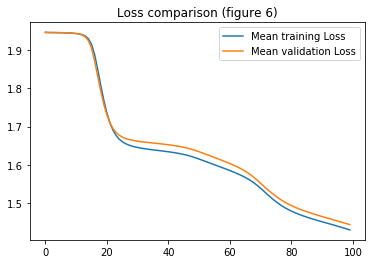

In [15]:
plt.plot(np.arange(len(train_loss)), train_loss, label='Mean training Loss')
plt.plot(np.arange(len(validation_loss)), 
         validation_loss, 
         label='Mean validation Loss')
plt.title('Loss comparison (figure 6)')
plt.legend()
plt.show()

<div style="background-color:#f0e7d1">
We will divide the data into 3 sets: one set will be the training set, one will be the validation set and one will be the test set. The training set will be used to effectively train the network. The validation set will help us prevent overfitting, by constantly checking whether the validation loss after one epoch exceeds twice the training loss per that epoch (as shown in figure 6, the mean losses per train and validation sets are very similar, suggesting that we are not overfitting). The testing set will be used to ultimately measure the performance of the network with the choices of parameters that we made, indicating which subset of hyperparameters are suitable. The training set will be ~70% of the data, the validation set ~15% and the test set 15%. We will be doing a simple form of SGD, where we process one instance at a time and then update the weights, processing all train samples in one epoch.

#### Question 8

In [16]:
def evaluate (test_data, network):
    test_input = test_data[:,:10]
    test_labels = test_data[:,10]
    no_test_samples = len(test_data)
    no_correct_predictions = 0
    for x,y in zip(test_input, test_labels):
        prediction = network.forward(x.reshape((10,1)))
        no_correct_predictions += (np.argmax(prediction)+1) == y
    accuracy = no_correct_predictions / no_test_samples
    return accuracy

In [17]:
print("accuracy: " + str(evaluate(test_samples,network)))

accuracy: 0.5513146734520781


<div style="background-color:#f0e7d1">

To calculate the performance of the network we will count the number of misclassified objects from the test set. Then we divide this number by the total number of objects in the test. We could multiply by 100 to get a percentage of misclassified objects. That would be the final evaluation of a network. We expect this to be as close to a unbiased evaluation as possible, since the network would not have seen at all the data in the test set.

#### Question 9

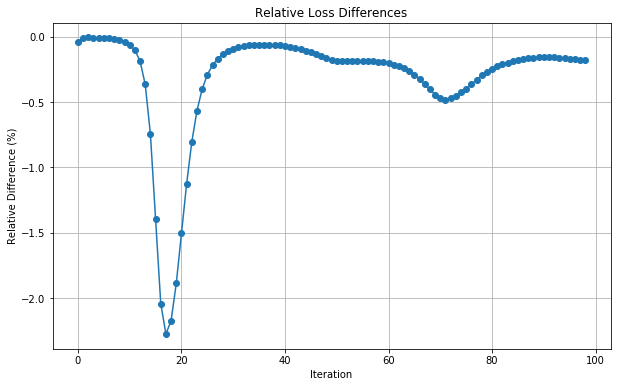

In [18]:
relative_diff = [100 * (train_loss[i + 1] - train_loss[i]) /
                 train_loss[i] for i in range(len(train_loss) - 1)]
plt.figure(figsize=(10, 6))
plt.plot(relative_diff, marker='o', linestyle='-')
plt.title('Relative Loss Differences')
plt.xlabel('Iteration')
plt.ylabel('Relative Difference (%)')
plt.grid(True)
plt.show()

<div style="background-color:#f0e7d1">

We will measure the loss function at each epoch and compare it to its previous value. If the relative difference is below a certain threshold we will stop, since the progress made in the last step is not significant enough. We also stop after a certain number of iterations (epochs) has been reached, if we have not stopped beforehand. Additionally, as mentioned earlier, we will also stop if we start overfitting.

#### Question 10

In [19]:
networks = [
    Network([10,35,7], sigmoid, sigmoid_prime, xavier),
    Network([10,35,7], sigmoid, sigmoid_prime, he),
    Network([10,35,7], sigmoid, sigmoid_prime, normal),
    Network([10,35,7], sigmoid, sigmoid_prime, randomfr)
]

epochs_list = [10, 50]
num_networks = len(networks)
num_epochs = len(epochs_list)

accuracies_matrix = np.zeros((num_networks, num_epochs))

for i, n in enumerate(networks):
    for j, ne in enumerate(epochs_list):
        train_loss, validation_loss = train(
            n,
            training_samples[:, :10],
            to_one_hot(training_samples[:, 10]),
            validation_samples[:, :10],
            to_one_hot(validation_samples[:, 10]),
            Loss,
            0.01,
            ne,
            0.0001
        )
        accuracies_matrix[i, j] = evaluate(test_samples, n)

Epoch: 0, current train loss: 1.9369713602651264
done in 10 epochs
Epoch: 0, current train loss: 1.3962905781508321
Epoch: 10, current train loss: 1.3182744119727863
Epoch: 20, current train loss: 1.2902999809456044
Epoch: 30, current train loss: 1.2758921860097483
Epoch: 40, current train loss: 1.267034143782916
done in 50 epochs
Epoch: 0, current train loss: 1.9087344043085783
done in 10 epochs
Epoch: 0, current train loss: 1.3648412422714864
Epoch: 10, current train loss: 1.305648259187404
Epoch: 20, current train loss: 1.2839317004130266
Epoch: 30, current train loss: 1.272317282481065
Epoch: 40, current train loss: 1.2648539543639559
done in 50 epochs
Epoch: 0, current train loss: 1.825115121166484
done in 10 epochs
Epoch: 0, current train loss: 1.4126166613832343
Epoch: 10, current train loss: 1.2886496268009853
Epoch: 20, current train loss: 1.2722178874533234
Epoch: 30, current train loss: 1.2642239084478957
Epoch: 40, current train loss: 1.2589308017903547
done in 50 epochs
Ep

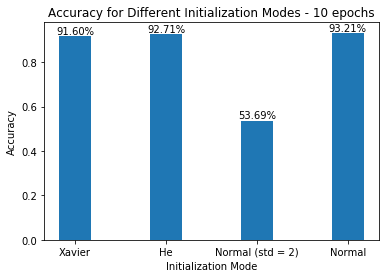

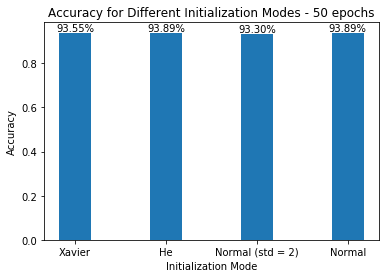

In [20]:
labels = ['Xavier', 'He', 'Normal (std = 2)', 'Normal']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, accuracies_matrix[:,0], width, label='Accuracy')

ax.set_xlabel('Initialization Mode')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Initialization Modes - 10 epochs')

ax.set_xticks(x)
ax.set_xticklabels(labels)

# Displaying specific values on top of each bar
for bar, accuracy in zip(bars, accuracies_matrix[:,0]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, 
            '{0:.2%}'.format(accuracy), ha='center', va='bottom')

plt.show()

fig, ax = plt.subplots()
bars = ax.bar(x, accuracies_matrix[:,1], width, label='Accuracy')

ax.set_xlabel('Initialization Mode')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Initialization Modes - 50 epochs')

ax.set_xticks(x)
ax.set_xticklabels(labels)

# Displaying specific values on top of each bar
for bar, accuracy in zip(bars, accuracies_matrix[:,1]):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, 
            '{0:.2%}'.format(accuracy), ha='center', va='bottom')

plt.show()

<div style="background-color:#f0e7d1">

We can see that if we only train for a few epochs, the normal distribution with a higher standard deviation performs way worse than the other options. But if we allow it to converge, we can see that all initialization modes perform rather similar. One intuition could be that all types sample from a normal distribution centered around 0, thus even if some may be more "lucky" than others at start, backpropagation will bring them to similar convergence values.

### 1.4 Optimization

#### Question 11

In [21]:
networks = [
    Network([10,7,7], sigmoid, sigmoid_prime, randomfr),
    Network([10,18,7], sigmoid, sigmoid_prime, randomfr),
    Network([10,30,7], sigmoid, sigmoid_prime, randomfr),
    Network([10,35,7], sigmoid, sigmoid_prime, randomfr),
    Network([10,15,20,7], sigmoid, sigmoid_prime, randomfr),
    Network([10,12,35,12,7], sigmoid, sigmoid_prime, randomfr)
]

accuracies = []

for n in networks:
    train_loss,validation_loss = train(
    n,
    training_samples[:,:10],
    to_one_hot(training_samples[:,10]),
    validation_samples[:,:10],
    to_one_hot(validation_samples[:,10]),
    Loss,
    0.01,
    50,
    0.0001)
    accuracies.append(evaluate(test_samples, n))

Epoch: 0, current train loss: 1.9457038188619509
Epoch: 10, current train loss: 1.4612002504582637
Epoch: 20, current train loss: 1.3718124005980727
Epoch: 30, current train loss: 1.3384171222079835
Epoch: 40, current train loss: 1.316561258749857
done in 50 epochs
Epoch: 0, current train loss: 1.8783788974822317
Epoch: 10, current train loss: 1.3379703938037328
Epoch: 20, current train loss: 1.2939647460662662
Epoch: 30, current train loss: 1.2768364302651338
Epoch: 40, current train loss: 1.2672308458979624
done in 50 epochs
Epoch: 0, current train loss: 1.919878990174859
Epoch: 10, current train loss: 1.330432161372048
Epoch: 20, current train loss: 1.2894679321646838
Epoch: 30, current train loss: 1.2740237334302729
Epoch: 40, current train loss: 1.2651440864905479
done in 50 epochs
Epoch: 0, current train loss: 1.7872329754256397
Epoch: 10, current train loss: 1.3195358193723081
Epoch: 20, current train loss: 1.2880278668059795
Epoch: 30, current train loss: 1.2749142417393755
Epo

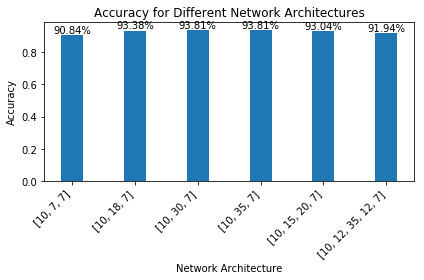

In [22]:
labels = ['[10, 7, 7]', '[10, 18, 7]', '[10, 30, 7]', 
          '[10, 35, 7]', '[10, 15, 20, 7]', '[10, 12, 35, 12, 7]']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
bars = ax.bar(x, accuracies, width, label='Accuracy')

ax.set_xlabel('Network Architecture')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy for Different Network Architectures')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')

# Displaying specific values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, 
            '{0:.2%}'.format(accuracy), ha='center', 
            va='bottom')

plt.tight_layout()
plt.show()

<div style="background-color:#f0e7d1">

The complexity of the data and the task at hand can also play a role. A deeper network (Architecture 5,6) might be unnecessary for a simpler task or dataset. If the relationships within the data can be captured effectively by a shallower network (like Architecture 2,3,4), there's no need for the additional complexity: deeper networks (like Architecture 5,6) can suffer from the vanishing gradient problem, where gradients become extremely small during backpropagation, making training difficult. This issue can hinder the convergence of the network and degrade performance.. 

However, if we stick to only one hidden layer, we can see that an increase in the number of neurons can lead to better performance. Each neuron in the hidden layer learns to represent different features or combinations of features from the input data. By increasing the number of neurons, you provide the network with more opportunities to discover meaningful / non-linear representations of the data, which can improve its ability to generalize to unseen examples.

#### Question 12

In [23]:
network = Network([10,35,7], sigmoid, sigmoid_prime, xavier)
train_loss,validation_loss = train(
    network,
    training_samples[:,:10],
    to_one_hot(training_samples[:,10]),
    validation_samples[:,:10],
    to_one_hot(validation_samples[:,10]),
    Loss,
    0.01,
    100,
    0.00001)

Epoch: 0, current train loss: 1.9369713602651264
Epoch: 10, current train loss: 1.3962905781508321
Epoch: 20, current train loss: 1.3182744119727863
Epoch: 30, current train loss: 1.2902999809456044
Epoch: 40, current train loss: 1.2758921860097483
Epoch: 50, current train loss: 1.267034143782916
Epoch: 60, current train loss: 1.2609586913454613
Epoch: 70, current train loss: 1.2564733404449893
Epoch: 80, current train loss: 1.2529813492489763
Epoch: 90, current train loss: 1.2501528737544516
done in 100 epochs


accuracy: 0.9354838709677419


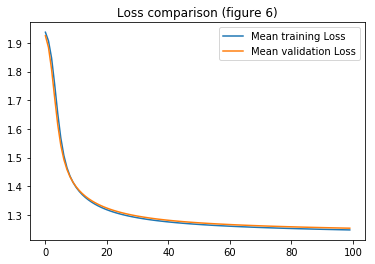

In [24]:
print("accuracy: " + str(evaluate(validation_samples,network)))
plt.plot(np.arange(len(train_loss)), train_loss, label='Mean training Loss')
plt.plot(np.arange(len(validation_loss)), 
         validation_loss, 
         label='Mean validation Loss')
plt.title('Loss comparison (figure 6)')
plt.legend()
plt.show()

<div style="background-color:#f0e7d1">

We chose this architecture because it yielded the best accuracy as shown previously. Moreover, it can also be seen that the loss converges after enough epochs, which validates our choice.

### 1.5 Evaluation

#### Question 13

In [25]:
print(evaluate(test_samples,network))
print(evaluate(validation_samples,network))

0.9406276505513147
0.9354838709677419


<div style="background-color:#f0e7d1">

The accuracies are not too different, since the network does not train on any of these inputs. The validation set is used to determine if overfitting occurs. This suggests that our model is generalizing well to unseen data, as it performs comparably well on both the validation and test sets.

#### Question 14

In [26]:
def create_confusion_matrix(net, test_data):
    mat = np.full((7,7),0)
    test_input = test_data[:,:10]
    test_labels = test_data[:,10]
    for x,y in zip(test_input, test_labels):
        pred=np.argmax(net.forward(x.reshape((10,1))))+1
        mat[int(y-1)][int(pred-1)]+=1
    return mat

In [27]:
cm = create_confusion_matrix(network,test_samples)
print(cm)

[[159   0   1   3   1   2   1]
 [  0 179   0   0   2   0   3]
 [  5   0 149   1   4   1   2]
 [  3   0   0 160   1   1   5]
 [  1   0   4   0 161   4   0]
 [  1   2   1   6   2 158   1]
 [  1   4   2   3   1   1 143]]


<div style="background-color:#f0e7d1">

First, to interpret the confusion matrix, the rows represent the actual classes, while the columns represent the predicted clases. Cell (i,j) represents the number of instances where the actual class was i and the predicted class was j.

Secondly, to evaluate the performance based on this matrix, we can see that overall it performs very well, indicated by the big numbers on the main diagonal. This shows that overall, there is a small number of misclassifications. Out of the 7 classes, it seems to struggle most with classes 4,6 and 7, as there are a couple of notable numbers in those rows and columns. Just to give an example, class 6 was misclassified 6 times as class 4, but even those 3 classes are over 90% of the time correctly classified.

#### Question 15

In [28]:
def train_and_shuffle(net, data, train_inputs_no, validation_inputs_no, 
                      criterion, learning_rate, no_epochs, epsilon):
    """Trains the neural network.

    Args:
        net: network or model. 
        inputs: input data.
        labels: labels. 
        criterion: loss function.
        lr: learning rate. 

    Returns:
        losses: a list containing the loss at every optimizer step. 
        accuracies: a list containing the accuracy at every optimizer step.
    """
    losses_train = []
    losses_validation = []
    no_epochs_done = 0
    for epochs_index in range(no_epochs):
        loss_epoch = []
        validation_epoch = []
        if epochs_index%10==0:
            np.random.shuffle(data)
            train_inputs=data[:train_inputs_no]
            train_labels=to_one_hot(train_inputs[:,10])
            train_inputs=train_inputs[:,:10]
            validation_inputs=data[train_inputs_no:]
            validation_labels=to_one_hot(validation_inputs[:,10])
            validation_inputs=validation_inputs[:,:10]
        for x,y in zip(train_inputs,train_labels):
            x = x.reshape((10,1))
            y = y.reshape((7,1))
            pred = net.forward(x)
            loss, delta = criterion(y,pred)
            loss_epoch.append(loss)
            net.backward(delta)
            net.optimizer_step(learning_rate)
        
        for x,y in zip(validation_inputs,validation_labels):
            pred=net.forward(x.reshape((10,1)))
            loss, grad=criterion(y.reshape((7,1)),pred)
            validation_epoch.append(loss)
        
        tl = np.mean(loss_epoch)
        vl = np.mean(validation_epoch)
        
        if epochs_index % 10 == 0:
            print("Epoch: " + str(epochs_index) + ", current train loss: " + str(tl))
        no_epochs_done += 1
        if len(losses_validation) > 0 and abs(100 * (vl - losses_validation[-1]) / losses_validation[-1]) < epsilon:
            break
        if tl*2 <= vl:
            print(tl)
            print(vl)
            break
        losses_train.append(tl)
        losses_validation.append(vl)
    print("done in " + str(no_epochs_done) + " epochs")
    return (losses_train,losses_validation)

In [29]:
all_samples=np.concatenate((features, targets.reshape(len(targets), 1)), axis = 1)
print(all_samples.shape)
tr=all_samples[:7000]
vl=all_samples[7000:]
network = Network([10,35,7], lrelu, lrelu_prime, randomfr)
train_loss,validation_loss = train_and_shuffle(
    network,
    all_samples,
    7200,
    600,
    Loss,
    0.0001,
    300,
    0.0001)


(7854, 11)
Epoch: 0, current train loss: 3.2443029964861774
Epoch: 10, current train loss: 1.6929659146989324
Epoch: 20, current train loss: 1.4557044496070561
Epoch: 30, current train loss: 1.3383616604005724
Epoch: 40, current train loss: 1.3092805207439688
Epoch: 50, current train loss: 1.278492970141907
Epoch: 60, current train loss: 1.0529432114219812
Epoch: 70, current train loss: 0.8358776465199441
Epoch: 80, current train loss: 0.7713178066830986
Epoch: 90, current train loss: 0.5316762522609453
Epoch: 100, current train loss: 0.5090928246552818
Epoch: 110, current train loss: 0.49529537174496074
Epoch: 120, current train loss: 0.49116785230561644
Epoch: 130, current train loss: 0.4744067191902481
Epoch: 140, current train loss: 0.34761689640744015
Epoch: 150, current train loss: 0.23987431954174038
Epoch: 160, current train loss: 0.22551258706113453
Epoch: 170, current train loss: 0.21860668236561234
Epoch: 180, current train loss: 0.20981266029424261
Epoch: 190, current train

<div style="background-color:#f0e7d1">

We decided to train on the entire dataset and check the possibility of overfitting with a validation set. We also tried shuffle the training and validation set every 10 epochs. With this architecture and activation function we achieved a score of 20/20 on the autograder!

### 1.6 Scikit-learn

#### Question 16

In [30]:
network1 = Network([10,35,7], lrelu, lrelu_prime, randomfr)
train_loss1,validation_loss1 = train(
    network1,
    training_samples[:,:10],
    to_one_hot(training_samples[:,10]),
    validation_samples[:,:10],
    to_one_hot(validation_samples[:,10]),
    Loss,
    0.01,
    100,
    0.00001)
network2 = Network([10,20,13,7], identity, identity_prime, randomfr)
train_loss1,validation_loss2 = train(
    network2,
    training_samples[:,:10],
    to_one_hot(training_samples[:,10]),
    validation_samples[:,:10],
    to_one_hot(validation_samples[:,10]),
    Loss,
    0.01,
    100,
    0.00001)
print(evaluate(test_samples,network1))
print(evaluate(test_samples,network2))

Epoch: 0, current train loss: 1.4518634970556583
Epoch: 10, current train loss: 0.22138628419151296
Epoch: 20, current train loss: 0.20486154283119684
Epoch: 30, current train loss: 0.19689781561652825
Epoch: 40, current train loss: 0.1922597726071407
Epoch: 50, current train loss: 0.18868710704824437
Epoch: 60, current train loss: 0.18562800453521713
Epoch: 70, current train loss: 0.18271219129653063
Epoch: 80, current train loss: 0.18018564708355217
Epoch: 90, current train loss: 0.17855560707891777
done in 100 epochs
Epoch: 0, current train loss: 0.8574261010981511
Epoch: 10, current train loss: 0.2357393883970335
Epoch: 20, current train loss: 0.22923943191897797
Epoch: 30, current train loss: 0.22679971639745247
Epoch: 40, current train loss: 0.22550228665943564
Epoch: 50, current train loss: 0.2246971009151063
Epoch: 60, current train loss: 0.22414668173902197
Epoch: 70, current train loss: 0.22374519357846004
Epoch: 80, current train loss: 0.22343855648972547
Epoch: 90, current 

<div style="background-color:#f0e7d1">

After running the grid search, we found that the best results were yielded for a network with he architecture of two hidden layers and 20 neurons on the first hidden layer and 13 on the second hidden layer and identity as an activation function. These results are a bit different from the architecture with one hidden layer and 35 neurons on that layer and Leaky ReLU as an activation function that we found. However, the performances are quite similar. We can however see that the average loss is smaller for the architecture we found. This might also be because our grid search with scikit did not test for Leaky ReLU as an activation function.

#### Question 17

In [31]:
print(evaluate(test_samples,network1))
print(evaluate(test_samples,network2))

0.9338422391857506
0.9279050042408821


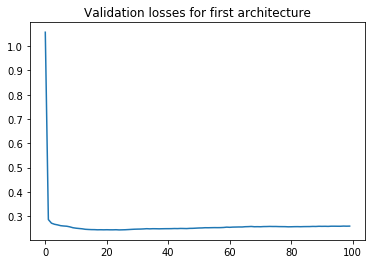

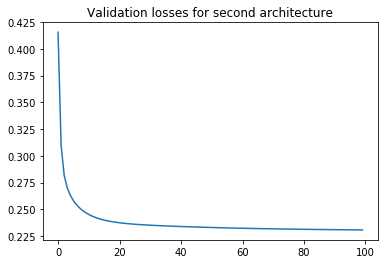

In [32]:
plt.plot(np.arange(len(validation_loss1)),validation_loss1)
plt.title('Validation losses for first architecture')
plt.show()
plt.plot(np.arange(len(validation_loss2)),validation_loss2)
plt.title('Validation losses for second architecture')
plt.show()

<div style="background-color:#f0e7d1">
The hyper-parameters found by scikit-learn are the same ones mentioned in the previous question.
It might be that the architecture scikit found could be slightly better because with more layers we can capture more relations between the features. The identity functions could function better according to scikit because many relations might still be linear between the data.

### 1.7 Reflection

#### Question 18

<div style="background-color:#f0e7d1">

One example of misclassification that can have harmful consequences can happen in the context of wars, through the need of distinguishing between civilians and combatants. The bias can be generated by factors such as ethnicity, religion, or clothing. For example, individuals coming from the Middle East have been accused wrongfully multiple times of being affiliated with terrorist organizations due to such biases. Implicating civilians in dangerous situations by misclassifying them as combatants, or the other way around , endangering society due to not being able to identify combatants correctly, can definitely have harmful consequences due to misclassification.

#### Question 19

<div style="background-color:#f0e7d1">

The first approach that we would propose is through education. Educating the masses on not only the possible harm that misclassification can bring, but also on the process of classification and the root of it, would definitely help with the mitigation of the damages. Focusing on empathy and understanding, educated individuals would be able to focus not only on the results of the classification, but also on their effects on others and how to improve these said results, by knowing more about how these results came into existence.

The second approach would be through legal means, more specifically, laws or rules that would regulate the whole flow of data, from the collection of it, its processing, all the way to the way it is used in the end. For example, this could involve laws that limit the power that automated processes have, in order to lower the possible damage that could be done due to misclassification. The development of ethics surrounding classification in general would also directly lead to better and more clearly formulated laws regarding the ethical part of classification, that would also result in the mitigation of the harm.

However, while these two approaches might improve the current situation, they may not be able to completely solve the problem. Since biases can also evolve over time and continuously change, the process of achieving true fairness along with 0 harm also has to be a continuous one, one that involves constant refinement and improvement.


### 1.8 Pen and paper

#### Question 20

<div style="background-color:#f0e7d1">

<figure>
  <img
  src="Q20.jpg"
  alt="Question 20"
  style="width: 600px">
</figure>

#### Question 21

<div style="background-color:#f0e7d1">

<figure>
  <img
  src="Q21.jpg"
  alt="Question 21"
  style="width: 600px">
</figure>

### 1.9 Division of work

#### Question 22

<div style="background-color:#f0e7d1">


|          Component          |  Name A   |  Name B   |  Name C   |  Name D   |
|-----------------------------|-----------|-----------|-----------|-----------|
| Code (design)               |     A     |     B     |     C     |     D     |
| Code (implementation)       |     A     |     B     |     C     |     D     |
| Code (validation)           |     A     |     B     |     C     |     D     |
| Experiments (execution)     |     A     |     B     |     C     |     D     |
| Experiments (analysis)      |     A     |     B     |     C     |     D     |
| Experiments (visualization) |     A     |     B     |     C     |     D     |
| Report (original draft)     |     A     |     B     |     C     |     D     |
| Report (reviewing, editing) |     A     |     B     |     C     |     D     |

This is the cell that writes our predictions to a file(Question 15)

In [33]:
predi=[]
for x in unknown:
    predi.append(1+np.argmax(network.forward(x.reshape((10,1)))))

with open('11_classes.txt', 'w') as csvfile:
    csvfile.write(','.join(map(str, predi)))

### References

<div style="background-color:#f0e7d1">